In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as  keras

DATASET_PATH = '/content/drive/MyDrive/data.json'

#load dataset
def load_data(dataset_path):
  with open(dataset_path, "r") as fp:
    data = json.load(fp)
  
  #convert lists to np array
  inputs = np.array(data['mfcc'])
  targets = np.array(data['labels'])

  return inputs, targets

if __name__ == '__main__':
  inputs, targets = load_data(DATASET_PATH)

In [4]:
#split data into train and test
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, 
                                                                       targets, 
                                                                       test_size=0.3)

In [14]:
#build network arch
model1 = keras.Sequential([
    #input layers
    keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])),
    keras.layers.Dropout(0.2),
    
    #hidden layer
    keras.layers.Dense(512, activation='relu'),
    # keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.2),

    #hidden layer
    keras.layers.Dense(256, activation='relu'),
    # keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.2),

    #hidden layer
    keras.layers.Dense(128, activation='relu'),
    # keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.2),

    #hidden layer
    keras.layers.Dense(64, activation='relu'),
    # keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.2),

    #output layer
    keras.layers.Dense(11, activation='softmax')
])

In [15]:
#compile network
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model1.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 1690)              0         
                                                                 
 dropout_13 (Dropout)        (None, 1690)              0         
                                                                 
 dense_12 (Dense)            (None, 512)               865792    
                                                                 
 dropout_14 (Dropout)        (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dropout_15 (Dropout)        (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 128)              

In [16]:
#train network
history = model1.fit(inputs_train, targets_train, validation_data=(inputs_test, targets_test),
          epochs=300,
          batch_size=32)
#100

Epoch 1/300
219/219 [==============================] - 6s 24ms/step - loss: 19.8537 - accuracy: 0.1454 - val_loss: 2.7036 - val_accuracy: 0.2934
Epoch 2/300
219/219 [==============================] - 6s 26ms/step - loss: 7.1398 - accuracy: 0.1671 - val_loss: 2.2512 - val_accuracy: 0.2500
Epoch 3/300
219/219 [==============================] - 5s 23ms/step - loss: 4.8169 - accuracy: 0.1681 - val_loss: 2.0859 - val_accuracy: 0.2834
Epoch 4/300
219/219 [==============================] - 6s 26ms/step - loss: 3.6187 - accuracy: 0.1938 - val_loss: 2.0570 - val_accuracy: 0.2884
Epoch 5/300
219/219 [==============================] - 6s 26ms/step - loss: 3.1007 - accuracy: 0.1954 - val_loss: 2.0850 - val_accuracy: 0.2620
Epoch 6/300
219/219 [==============================] - 5s 22ms/step - loss: 2.8112 - accuracy: 0.2056 - val_loss: 2.0228 - val_accuracy: 0.2837
Epoch 7/300
219/219 [==============================] - 5s 23ms/step - loss: 2.5952 - accuracy: 0.2124 - val_loss: 1.9349 - val_accuracy

Text(0.5, 0, 'epoch')

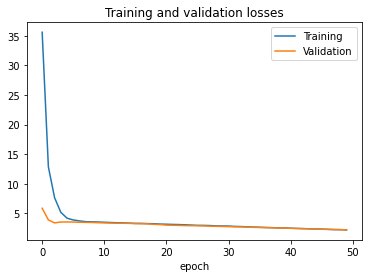

In [ ]:
import matplotlib.pyplot as plt
#PLOT GRAPH BETWEEN TRAINING AND VALIDATION LOSS
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation losses")
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

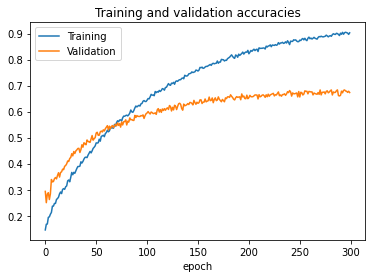

In [17]:
import matplotlib.pyplot as plt
#PLOT GRAPH BETWEEN TRAINING AND VALIDATION LOSS
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation accuracies")
plt.xlabel('epoch')